# Train Log 20181023 - voxel size: 0.2

## Results
```
2018-10-23 10:28:40.775860   Train one epoch  20 /  20


100%|██████████| 233/233 [03:39<00:00,  1.06it/s]

2018-10-23 10:32:20.163772  [Epoch 19] mean loss: 0.000083
2018-10-23 10:32:20.164216  [Epoch 19] accuracy: 0.992635
2018-10-23 10:32:20.164915  [Epoch 19] avg class acc: 0.992593
2018-10-23 10:32:20.165269  [Epoch 19] indivisual [0] class recall: 0.977778
2018-10-23 10:32:20.165431  [Epoch 19] indivisual [0] class precision: 1.000000
2018-10-23 10:32:20.165672  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-23 10:32:20.165852  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-23 10:32:20.166201  [Epoch 19] indivisual [2] class recall: 1.000000
2018-10-23 10:32:20.166615  [Epoch 19] indivisual [2] class precision: 0.906250
2018-10-23 10:32:20.166882   Evaluation one (validation set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.52it/s]

2018-10-23 10:32:33.132681  [Epoch 19] vali mean loss: 0.000332
2018-10-23 10:32:33.132902  [Epoch 19] vali accuracy: 0.991793
2018-10-23 10:32:33.133257  [Epoch 19] vali avg class acc: 0.333333
2018-10-23 10:32:33.133632  [Epoch 19] vali indivisual [0] class recall: 0.992701
2018-10-23 10:32:33.133778  [Epoch 19] vali indivisual [0] class precision: 0.992701
2018-10-23 10:32:33.133966  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-23 10:32:33.134160  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-23 10:32:33.134540  [Epoch 19] vali indivisual [2] class recall: 0.965517
2018-10-23 10:32:33.134719  [Epoch 19] vali indivisual [2] class precision: 0.965517
2018-10-23 10:32:33.134830   Evaluation one (test set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-23 10:32:46.178971  [Epoch 19] test mean loss: 0.000332
2018-10-23 10:32:46.179223  [Epoch 19] test accuracy: 0.990621
2018-10-23 10:32:46.179758  [Epoch 19] test avg class acc: 0.978495
2018-10-23 10:32:46.180117  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-23 10:32:46.180409  [Epoch 19] test indivisual [0] class precision: 0.984733
2018-10-23 10:32:46.180681  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-23 10:32:46.180805  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-23 10:32:46.180969  [Epoch 19] test indivisual [2] class recall: 0.935484
2018-10-23 10:32:46.181287  [Epoch 19] test indivisual [2] class precision: 1.000000


```

## Trained model
* [Download link]()

## Evaluation
* Incorrect sample
![results]()

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import time , datetime

sys.path.append( os.path.abspath('../../../Dataset/scripts'))
from utils import *

sys.path.append( os.path.abspath('../../model') )
from train import *
import model as MODEL

In [1]:
""" Path """

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_200_20181022_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_200_20181022_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_200_20181022_ndb_aug_v2_20181020/vali.h5')

log_path = os.path.abspath('./train_log_20181022_v2.txt')

model_save_path = os.path.abspath('./model')
if not os.path.isdir(model_save_path) : os.mkdir(model_save_path)

""" Parameters """
GPU_INDEX = 0
NUM_POINT = 256
NUM_CLASSES = 3

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(200000)
BN_DECAY_CLIP = 0.99
DECAY_STEP = BN_DECAY_DECAY_STEP
DECAY_RATE = BN_DECAY_DECAY_RATE

BATCH_SIZE = 250

MOMENTUM = 0.9

BASE_LEARNING_RATE = 0.001

OPTIMIZER = 'adam'

MAX_EPOCH = 20

NameError: name 'os' is not defined

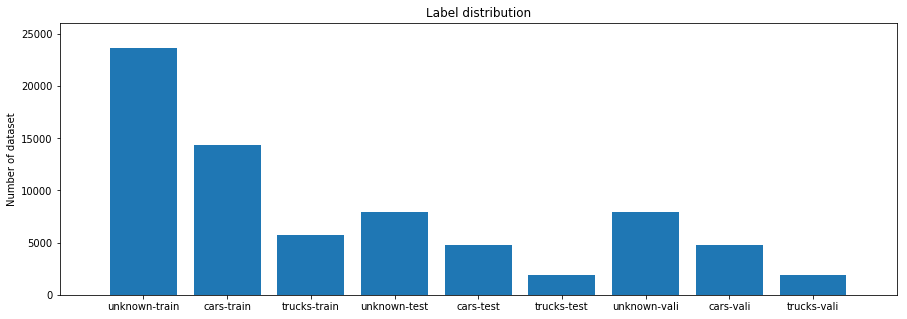

In [3]:
""" Load dataset"""

data = []
label = []

data_train, label_train = load_h5(data_train_path)
data_vali, label_vali = load_h5(data_vali_path)
data_test, label_test = load_h5(data_test_path)

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)

""" Data statistics"""

label_list = [0,1,2]

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 
        'unknown-test', 'cars-test', 'trucks-test', 
        'unknown-vali', 'cars-vali', 'trucks-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [4]:
""" log file """
LOG_FOUT = open(log_path, 'w')

def log_string(out_str):
    out_str = str( datetime.datetime.fromtimestamp( time.time() ) ) + "  " + out_str
    LOG_FOUT.write(out_str+'\n')
    LOG_FOUT.flush()
    print(out_str)
    
    
def get_learning_rate(batch):
    learning_rate = tf.train.exponential_decay(
                        BASE_LEARNING_RATE,  # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        DECAY_STEP,          # Decay step.
                        DECAY_RATE,          # Decay rate.
                        staircase=True)
    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
    return learning_rate        

def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch * BATCH_SIZE,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay

""" load traing model """
with tf.Graph().as_default():
    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())
        print(is_training_pl)

        # Note the global_step=batch parameter to minimize. 
        # That tells the optimizer to helpfully increment the 'batch' parameter for you every time it trains.
        batch = tf.Variable(0)
        bn_decay = get_bn_decay(batch)
        tf.summary.scalar('bn_decay', bn_decay)

        # Get model and loss 
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl, bn_decay=bn_decay)
        loss = MODEL.get_loss(pred, labels_pl, end_points)
        tf.summary.scalar('loss', loss)

        correct = tf.equal(tf.argmax(pred, 1), tf.to_int64(labels_pl))
        accuracy = tf.reduce_sum(tf.cast(correct, tf.float32)) / float(BATCH_SIZE)
        tf.summary.scalar('accuracy', accuracy)

        # Get training operator
        learning_rate = get_learning_rate(batch)
        tf.summary.scalar('learning_rate', learning_rate)
        if OPTIMIZER == 'momentum':
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=MOMENTUM)
        elif OPTIMIZER == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=batch)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = False
    sess = tf.Session(config=config)

    # Add summary writers
    #merged = tf.merge_all_summaries()
    merged = tf.summary.merge_all()

    train_writer_path = os.path.abspath('./train')
    if os.path.isdir(train_writer_path): os.system('rm -r {}'.format(train_writer_path))
    os.mkdir(train_writer_path)
        
    test_writer_path = os.path.abspath('./test')
    if os.path.isdir(test_writer_path): os.system('rm -r {}'.format(test_writer_path))
    os.mkdir(test_writer_path)
    
    
    train_writer = tf.summary.FileWriter(train_writer_path, sess.graph)
    test_writer = tf.summary.FileWriter(test_writer_path)
    
    
    # Init variables
    init = tf.global_variables_initializer()
    # To fix the bug introduced in TF 0.12.1 as in
    # http://stackoverflow.com/questions/41543774/invalidargumenterror-for-tensor-bool-tensorflow-0-12-1
    #sess.run(init)
    sess.run(init, {is_training_pl: True})

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'train_op': train_op,
           'merged': merged,
           'step': batch}
    
    data_train = np.concatenate(data[:2])
    label_train = np.concatenate(label[:2])
    
    data_vali = data[1]
    label_vali = label[1]
    
    data_test = data[2]
    label_test = label[2]
    
        
    for epoch in range(MAX_EPOCH):
        
        ## Training
        log_string ( " Train one epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = True
        
        # Shuffle train files
        train_file_idxs = np.arange(0, data_train.shape[0])
        np.random.shuffle(train_file_idxs)
        
        current_data = data_train[train_file_idxs] 
        current_label = label_train[train_file_idxs]
              
        ## Evaluation metric
        total_correct = 0
        total_seen = 0
        loss_sum = 0
        
        total_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
            
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE           

            # Augment batched point clouds by rotation and jittering
            rotated_data = provider.rotate_point_cloud(current_data[start_idx:end_idx, :, :])
            jittered_data = provider.jitter_point_cloud(rotated_data)
            
            feed_dict = {ops['pointclouds_pl']: jittered_data,
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training,}
            
            summary, step, _, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['train_op'], ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            train_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            loss_sum += loss_val
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    


        ## Evaluation using validation set    
        log_string ( " Evaluation one (validation set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle validation files
        file_idxs = np.arange(0, data_vali.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_vali[file_idxs]
        current_label = label_vali[file_idxs]
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            # test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] vali mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class) / np.array(total_class) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] vali indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] vali indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
            
        ## Evaluation using test set    
        log_string ( " Evaluation one (test set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle test files
        file_idxs = np.arange(0, data_test.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_test[file_idxs]
        current_label = label_test[file_idxs]
        
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] test mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] test accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] test avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] test indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] test indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
 
        # Save the variables to disk.
        if epoch % 10 == 0:
            save_path = saver.save(sess, os.path.join(model_save_path, "model.ckpt"))
            log_string("Model saved in file: %s" % save_path)
                

Tensor("Placeholder_2:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
2018-10-23 09:10:16.233557   Train one epoch   1 /  20


100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-23 09:13:46.888524  [Epoch 0] mean loss: 0.002851
2018-10-23 09:13:46.889144  [Epoch 0] accuracy: 0.843777
2018-10-23 09:13:46.889707  [Epoch 0] avg class acc: 0.825776
2018-10-23 09:13:46.890158  [Epoch 0] indivisual [0] class recall: 0.850000
2018-10-23 09:13:46.890548  [Epoch 0] indivisual [0] class precision: 0.944444
2018-10-23 09:13:46.890655  [Epoch 0] indivisual [1] class recall: 0.913043
2018-10-23 09:13:46.890910  [Epoch 0] indivisual [1] class precision: 0.851351
2018-10-23 09:13:46.891104  [Epoch 0] indivisual [2] class recall: 0.714286
2018-10-23 09:13:46.891522  [Epoch 0] indivisual [2] class precision: 0.468750
2018-10-23 09:13:46.891874   Evaluation one (validation set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.63it/s]

2018-10-23 09:13:59.545871  [Epoch 0] vali mean loss: 0.011454
2018-10-23 09:13:59.546795  [Epoch 0] vali accuracy: 0.925931
2018-10-23 09:13:59.547273  [Epoch 0] vali avg class acc: 0.000000
2018-10-23 09:13:59.547634  [Epoch 0] vali indivisual [0] class recall: 0.946970
2018-10-23 09:13:59.547892  [Epoch 0] vali indivisual [0] class precision: 0.925926
2018-10-23 09:13:59.548235  [Epoch 0] vali indivisual [1] class recall: 0.976744
2018-10-23 09:13:59.548653  [Epoch 0] vali indivisual [1] class precision: 0.943820
2018-10-23 09:13:59.549075  [Epoch 0] vali indivisual [2] class recall: 0.718750
2018-10-23 09:13:59.549329  [Epoch 0] vali indivisual [2] class precision: 0.884615
2018-10-23 09:13:59.549435   Evaluation one (test set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]


2018-10-23 09:14:12.010754  [Epoch 0] test mean loss: 0.011454
2018-10-23 09:14:12.011789  [Epoch 0] test accuracy: 0.927241
2018-10-23 09:14:12.013605  [Epoch 0] test avg class acc: 0.852121
2018-10-23 09:14:12.013758  [Epoch 0] test indivisual [0] class recall: 0.955224
2018-10-23 09:14:12.014109  [Epoch 0] test indivisual [0] class precision: 0.927536
2018-10-23 09:14:12.014724  [Epoch 0] test indivisual [1] class recall: 0.988235
2018-10-23 09:14:12.014825  [Epoch 0] test indivisual [1] class precision: 0.954545
2018-10-23 09:14:12.015114  [Epoch 0] test indivisual [2] class recall: 0.612903
2018-10-23 09:14:12.015368  [Epoch 0] test indivisual [2] class precision: 0.791667
2018-10-23 09:14:12.915587  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v2/model/model.ckpt
2018-10-23 09:14:12.915822   Train one epoch   2 /  20


100%|██████████| 233/233 [03:32<00:00,  1.10it/s]

2018-10-23 09:17:45.790474  [Epoch 1] mean loss: 0.000937
2018-10-23 09:17:45.791200  [Epoch 1] accuracy: 0.923227
2018-10-23 09:17:45.791806  [Epoch 1] avg class acc: 0.887501
2018-10-23 09:17:45.792092  [Epoch 1] indivisual [0] class recall: 0.917910
2018-10-23 09:17:45.792341  [Epoch 1] indivisual [0] class precision: 0.917910
2018-10-23 09:17:45.792586  [Epoch 1] indivisual [1] class recall: 0.905882
2018-10-23 09:17:45.792832  [Epoch 1] indivisual [1] class precision: 1.000000
2018-10-23 09:17:45.793200  [Epoch 1] indivisual [2] class recall: 0.838710
2018-10-23 09:17:45.793427  [Epoch 1] indivisual [2] class precision: 0.666667
2018-10-23 09:17:45.793529   Evaluation one (validation set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.61it/s]

2018-10-23 09:17:58.493326  [Epoch 1] vali mean loss: 0.003763
2018-10-23 09:17:58.494089  [Epoch 1] vali accuracy: 0.832483
2018-10-23 09:17:58.494827  [Epoch 1] vali avg class acc: 0.000000
2018-10-23 09:17:58.495076  [Epoch 1] vali indivisual [0] class recall: 0.943089
2018-10-23 09:17:58.495415  [Epoch 1] vali indivisual [0] class precision: 0.753247
2018-10-23 09:17:58.495730  [Epoch 1] vali indivisual [1] class recall: 0.545455
2018-10-23 09:17:58.496091  [Epoch 1] vali indivisual [1] class precision: 1.000000
2018-10-23 09:17:58.496353  [Epoch 1] vali indivisual [2] class recall: 0.897436
2018-10-23 09:17:58.496705  [Epoch 1] vali indivisual [2] class precision: 0.729167
2018-10-23 09:17:58.496808   Evaluation one (test set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.57it/s]

2018-10-23 09:18:11.292211  [Epoch 1] test mean loss: 0.003763
2018-10-23 09:18:11.292544  [Epoch 1] test accuracy: 0.831172
2018-10-23 09:18:11.293138  [Epoch 1] test avg class acc: 0.837158
2018-10-23 09:18:11.293304  [Epoch 1] test indivisual [0] class recall: 0.966667
2018-10-23 09:18:11.293437  [Epoch 1] test indivisual [0] class precision: 0.773333
2018-10-23 09:18:11.293588  [Epoch 1] test indivisual [1] class recall: 0.617978
2018-10-23 09:18:11.293749  [Epoch 1] test indivisual [1] class precision: 1.000000
2018-10-23 09:18:11.294448  [Epoch 1] test indivisual [2] class recall: 0.926829
2018-10-23 09:18:11.294698  [Epoch 1] test indivisual [2] class precision: 0.844444
2018-10-23 09:18:11.295059   Train one epoch   3 /  20



100%|██████████| 233/233 [03:35<00:00,  1.08it/s]

2018-10-23 09:21:46.721975  [Epoch 2] mean loss: 0.000717
2018-10-23 09:21:46.722583  [Epoch 2] accuracy: 0.935708
2018-10-23 09:21:46.723299  [Epoch 2] avg class acc: 0.889014
2018-10-23 09:21:46.723564  [Epoch 2] indivisual [0] class recall: 0.934783
2018-10-23 09:21:46.723761  [Epoch 2] indivisual [0] class precision: 0.941606
2018-10-23 09:21:46.724436  [Epoch 2] indivisual [1] class recall: 0.974684
2018-10-23 09:21:46.724692  [Epoch 2] indivisual [1] class precision: 0.974684
2018-10-23 09:21:46.725143  [Epoch 2] indivisual [2] class recall: 0.757576
2018-10-23 09:21:46.725409  [Epoch 2] indivisual [2] class precision: 0.735294
2018-10-23 09:21:46.725676   Evaluation one (validation set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.56it/s]

2018-10-23 09:21:59.577572  [Epoch 2] vali mean loss: 0.002878
2018-10-23 09:21:59.578323  [Epoch 2] vali accuracy: 0.939310
2018-10-23 09:21:59.578716  [Epoch 2] vali avg class acc: 0.333333
2018-10-23 09:21:59.579227  [Epoch 2] vali indivisual [0] class recall: 0.895833
2018-10-23 09:21:59.579445  [Epoch 2] vali indivisual [0] class precision: 0.992308
2018-10-23 09:21:59.579766  [Epoch 2] vali indivisual [1] class recall: 0.986111
2018-10-23 09:21:59.580144  [Epoch 2] vali indivisual [1] class precision: 0.986111
2018-10-23 09:21:59.580504  [Epoch 2] vali indivisual [2] class recall: 1.000000
2018-10-23 09:21:59.580599  [Epoch 2] vali indivisual [2] class precision: 0.708333
2018-10-23 09:21:59.580820   Evaluation one (test set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.57it/s]

2018-10-23 09:22:12.392543  [Epoch 2] test mean loss: 0.002878
2018-10-23 09:22:12.393551  [Epoch 2] test accuracy: 0.942759
2018-10-23 09:22:12.393877  [Epoch 2] test avg class acc: 0.940944
2018-10-23 09:22:12.394220  [Epoch 2] test indivisual [0] class recall: 0.903704
2018-10-23 09:22:12.394684  [Epoch 2] test indivisual [0] class precision: 0.968254
2018-10-23 09:22:12.394836  [Epoch 2] test indivisual [1] class recall: 0.974684
2018-10-23 09:22:12.395198  [Epoch 2] test indivisual [1] class precision: 0.962500
2018-10-23 09:22:12.395472  [Epoch 2] test indivisual [2] class recall: 0.944444
2018-10-23 09:22:12.395833  [Epoch 2] test indivisual [2] class precision: 0.772727
2018-10-23 09:22:12.395943   Train one epoch   4 /  20



100%|██████████| 233/233 [03:37<00:00,  1.07it/s]

2018-10-23 09:25:49.866684  [Epoch 3] mean loss: 0.000560
2018-10-23 09:25:49.867095  [Epoch 3] accuracy: 0.947914
2018-10-23 09:25:49.867455  [Epoch 3] avg class acc: 0.939203
2018-10-23 09:25:49.868059  [Epoch 3] indivisual [0] class recall: 0.957143
2018-10-23 09:25:49.868301  [Epoch 3] indivisual [0] class precision: 0.957143
2018-10-23 09:25:49.868699  [Epoch 3] indivisual [1] class recall: 1.000000
2018-10-23 09:25:49.869004  [Epoch 3] indivisual [1] class precision: 1.000000
2018-10-23 09:25:49.869289  [Epoch 3] indivisual [2] class recall: 0.860465
2018-10-23 09:25:49.869653  [Epoch 3] indivisual [2] class precision: 0.860465
2018-10-23 09:25:49.869848   Evaluation one (validation set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.55it/s]

2018-10-23 09:26:02.727335  [Epoch 3] vali mean loss: 0.002248
2018-10-23 09:26:02.728133  [Epoch 3] vali accuracy: 0.956414
2018-10-23 09:26:02.728754  [Epoch 3] vali avg class acc: 0.333333
2018-10-23 09:26:02.728971  [Epoch 3] vali indivisual [0] class recall: 0.984615
2018-10-23 09:26:02.729123  [Epoch 3] vali indivisual [0] class precision: 0.941176
2018-10-23 09:26:02.729286  [Epoch 3] vali indivisual [1] class recall: 1.000000
2018-10-23 09:26:02.730038  [Epoch 3] vali indivisual [1] class precision: 1.000000
2018-10-23 09:26:02.730257  [Epoch 3] vali indivisual [2] class recall: 0.789474
2018-10-23 09:26:02.730410  [Epoch 3] vali indivisual [2] class precision: 0.937500
2018-10-23 09:26:02.730619   Evaluation one (test set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.52it/s]

2018-10-23 09:26:15.685293  [Epoch 3] test mean loss: 0.002248
2018-10-23 09:26:15.685900  [Epoch 3] test accuracy: 0.954069
2018-10-23 09:26:15.686824  [Epoch 3] test avg class acc: 0.906286
2018-10-23 09:26:15.687211  [Epoch 3] test indivisual [0] class recall: 0.976000
2018-10-23 09:26:15.687787  [Epoch 3] test indivisual [0] class precision: 0.938462
2018-10-23 09:26:15.688130  [Epoch 3] test indivisual [1] class recall: 1.000000
2018-10-23 09:26:15.688267  [Epoch 3] test indivisual [1] class precision: 0.978261
2018-10-23 09:26:15.688460  [Epoch 3] test indivisual [2] class recall: 0.742857
2018-10-23 09:26:15.688642  [Epoch 3] test indivisual [2] class precision: 0.928571
2018-10-23 09:26:15.688831   Train one epoch   5 /  20



100%|██████████| 233/233 [03:39<00:00,  1.06it/s]

2018-10-23 09:29:55.815616  [Epoch 4] mean loss: 0.000399
2018-10-23 09:29:55.816525  [Epoch 4] accuracy: 0.960223
2018-10-23 09:29:55.817023  [Epoch 4] avg class acc: 0.982207
2018-10-23 09:29:55.817354  [Epoch 4] indivisual [0] class recall: 0.976923
2018-10-23 09:29:55.817784  [Epoch 4] indivisual [0] class precision: 0.992188
2018-10-23 09:29:55.818044  [Epoch 4] indivisual [1] class recall: 1.000000
2018-10-23 09:29:55.818141  [Epoch 4] indivisual [1] class precision: 1.000000
2018-10-23 09:29:55.818394  [Epoch 4] indivisual [2] class recall: 0.969697
2018-10-23 09:29:55.818650  [Epoch 4] indivisual [2] class precision: 0.914286
2018-10-23 09:29:55.818774   Evaluation one (validation set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.55it/s]

2018-10-23 09:30:08.677408  [Epoch 4] vali mean loss: 0.001605
2018-10-23 09:30:08.678528  [Epoch 4] vali accuracy: 0.959724
2018-10-23 09:30:08.679053  [Epoch 4] vali avg class acc: 0.000000
2018-10-23 09:30:08.679397  [Epoch 4] vali indivisual [0] class recall: 0.992593
2018-10-23 09:30:08.679558  [Epoch 4] vali indivisual [0] class precision: 0.971014
2018-10-23 09:30:08.679708  [Epoch 4] vali indivisual [1] class recall: 0.988636
2018-10-23 09:30:08.680023  [Epoch 4] vali indivisual [1] class precision: 1.000000
2018-10-23 09:30:08.680229  [Epoch 4] vali indivisual [2] class recall: 0.888889
2018-10-23 09:30:08.680925  [Epoch 4] vali indivisual [2] class precision: 0.960000
2018-10-23 09:30:08.681303   Evaluation one (test set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.47it/s]

2018-10-23 09:30:21.780771  [Epoch 4] test mean loss: 0.001605
2018-10-23 09:30:21.781275  [Epoch 4] test accuracy: 0.962000
2018-10-23 09:30:21.782172  [Epoch 4] test avg class acc: 0.964722
2018-10-23 09:30:21.782340  [Epoch 4] test indivisual [0] class recall: 0.985075
2018-10-23 09:30:21.782678  [Epoch 4] test indivisual [0] class precision: 0.985075
2018-10-23 09:30:21.782963  [Epoch 4] test indivisual [1] class recall: 1.000000
2018-10-23 09:30:21.783111  [Epoch 4] test indivisual [1] class precision: 1.000000
2018-10-23 09:30:21.783299  [Epoch 4] test indivisual [2] class recall: 0.909091
2018-10-23 09:30:21.783559  [Epoch 4] test indivisual [2] class precision: 0.909091
2018-10-23 09:30:21.783691   Train one epoch   6 /  20



100%|██████████| 233/233 [03:41<00:00,  1.05it/s]

2018-10-23 09:34:03.744398  [Epoch 5] mean loss: 0.000397
2018-10-23 09:34:03.745232  [Epoch 5] accuracy: 0.962232
2018-10-23 09:34:03.745817  [Epoch 5] avg class acc: 0.954097
2018-10-23 09:34:03.746046  [Epoch 5] indivisual [0] class recall: 0.976378
2018-10-23 09:34:03.746489  [Epoch 5] indivisual [0] class precision: 0.968750
2018-10-23 09:34:03.746784  [Epoch 5] indivisual [1] class recall: 0.989362
2018-10-23 09:34:03.747086  [Epoch 5] indivisual [1] class precision: 1.000000
2018-10-23 09:34:03.747518  [Epoch 5] indivisual [2] class recall: 0.896552
2018-10-23 09:34:03.747615  [Epoch 5] indivisual [2] class precision: 0.896552
2018-10-23 09:34:03.747976   Evaluation one (validation set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.55it/s]

2018-10-23 09:34:16.598881  [Epoch 5] vali mean loss: 0.001595
2018-10-23 09:34:16.599725  [Epoch 5] vali accuracy: 0.974690
2018-10-23 09:34:16.600119  [Epoch 5] vali avg class acc: 0.333333
2018-10-23 09:34:16.600704  [Epoch 5] vali indivisual [0] class recall: 0.960000
2018-10-23 09:34:16.600938  [Epoch 5] vali indivisual [0] class precision: 0.979592
2018-10-23 09:34:16.601085  [Epoch 5] vali indivisual [1] class recall: 1.000000
2018-10-23 09:34:16.601306  [Epoch 5] vali indivisual [1] class precision: 1.000000
2018-10-23 09:34:16.601481  [Epoch 5] vali indivisual [2] class recall: 0.906250
2018-10-23 09:34:16.602090  [Epoch 5] vali indivisual [2] class precision: 0.828571
2018-10-23 09:34:16.602227   Evaluation one (test set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.52it/s]

2018-10-23 09:34:29.550127  [Epoch 5] test mean loss: 0.001595
2018-10-23 09:34:29.550591  [Epoch 5] test accuracy: 0.973586
2018-10-23 09:34:29.551357  [Epoch 5] test avg class acc: 0.932372
2018-10-23 09:34:29.551649  [Epoch 5] test indivisual [0] class recall: 0.984615
2018-10-23 09:34:29.551967  [Epoch 5] test indivisual [0] class precision: 0.955224
2018-10-23 09:34:29.552229  [Epoch 5] test indivisual [1] class recall: 1.000000
2018-10-23 09:34:29.552387  [Epoch 5] test indivisual [1] class precision: 1.000000
2018-10-23 09:34:29.552616  [Epoch 5] test indivisual [2] class recall: 0.812500
2018-10-23 09:34:29.552780  [Epoch 5] test indivisual [2] class precision: 0.928571
2018-10-23 09:34:29.553278   Train one epoch   7 /  20



100%|██████████| 233/233 [03:42<00:00,  1.05it/s]

2018-10-23 09:38:12.158886  [Epoch 6] mean loss: 0.000368
2018-10-23 09:38:12.159771  [Epoch 6] accuracy: 0.964996
2018-10-23 09:38:12.160804  [Epoch 6] avg class acc: 0.988962
2018-10-23 09:38:12.161179  [Epoch 6] indivisual [0] class recall: 0.966887
2018-10-23 09:38:12.161476  [Epoch 6] indivisual [0] class precision: 1.000000
2018-10-23 09:38:12.161891  [Epoch 6] indivisual [1] class recall: 1.000000
2018-10-23 09:38:12.161996  [Epoch 6] indivisual [1] class precision: 1.000000
2018-10-23 09:38:12.162260  [Epoch 6] indivisual [2] class recall: 1.000000
2018-10-23 09:38:12.162519  [Epoch 6] indivisual [2] class precision: 0.833333
2018-10-23 09:38:12.162917   Evaluation one (validation set) epoch   7 /  20



100%|██████████| 58/58 [00:13<00:00,  4.46it/s]

2018-10-23 09:38:25.272332  [Epoch 6] vali mean loss: 0.001480
2018-10-23 09:38:25.273065  [Epoch 6] vali accuracy: 0.975103
2018-10-23 09:38:25.273783  [Epoch 6] vali avg class acc: 0.333333
2018-10-23 09:38:25.273966  [Epoch 6] vali indivisual [0] class recall: 0.963768
2018-10-23 09:38:25.274316  [Epoch 6] vali indivisual [0] class precision: 0.992537
2018-10-23 09:38:25.274603  [Epoch 6] vali indivisual [1] class recall: 1.000000
2018-10-23 09:38:25.274869  [Epoch 6] vali indivisual [1] class precision: 1.000000
2018-10-23 09:38:25.275316  [Epoch 6] vali indivisual [2] class recall: 0.970588
2018-10-23 09:38:25.275416  [Epoch 6] vali indivisual [2] class precision: 0.868421
2018-10-23 09:38:25.275691   Evaluation one (test set) epoch   7 /  20



100%|██████████| 58/58 [00:13<00:00,  4.44it/s]

2018-10-23 09:38:38.426231  [Epoch 6] test mean loss: 0.001480
2018-10-23 09:38:38.427030  [Epoch 6] test accuracy: 0.976552
2018-10-23 09:38:38.427599  [Epoch 6] test avg class acc: 0.950700
2018-10-23 09:38:38.427892  [Epoch 6] test indivisual [0] class recall: 0.977099
2018-10-23 09:38:38.428185  [Epoch 6] test indivisual [0] class precision: 0.969697
2018-10-23 09:38:38.428617  [Epoch 6] test indivisual [1] class recall: 1.000000
2018-10-23 09:38:38.428722  [Epoch 6] test indivisual [1] class precision: 0.975309
2018-10-23 09:38:38.429099  [Epoch 6] test indivisual [2] class recall: 0.875000
2018-10-23 09:38:38.429260  [Epoch 6] test indivisual [2] class precision: 0.945946
2018-10-23 09:38:38.429667   Train one epoch   8 /  20



100%|██████████| 233/233 [03:43<00:00,  1.04it/s]

2018-10-23 09:42:22.391879  [Epoch 7] mean loss: 0.000270
2018-10-23 09:42:22.392649  [Epoch 7] accuracy: 0.973820
2018-10-23 09:42:22.393178  [Epoch 7] avg class acc: 0.979872
2018-10-23 09:42:22.393677  [Epoch 7] indivisual [0] class recall: 0.992248
2018-10-23 09:42:22.393929  [Epoch 7] indivisual [0] class precision: 0.984615
2018-10-23 09:42:22.394167  [Epoch 7] indivisual [1] class recall: 1.000000
2018-10-23 09:42:22.394430  [Epoch 7] indivisual [1] class precision: 1.000000
2018-10-23 09:42:22.394856  [Epoch 7] indivisual [2] class recall: 0.947368
2018-10-23 09:42:22.395147  [Epoch 7] indivisual [2] class precision: 0.972973
2018-10-23 09:42:22.395258   Evaluation one (validation set) epoch   8 /  20



100%|██████████| 58/58 [00:13<00:00,  4.46it/s]

2018-10-23 09:42:35.503005  [Epoch 7] vali mean loss: 0.001085
2018-10-23 09:42:35.503981  [Epoch 7] vali accuracy: 0.969724
2018-10-23 09:42:35.504272  [Epoch 7] vali avg class acc: 0.333333
2018-10-23 09:42:35.504591  [Epoch 7] vali indivisual [0] class recall: 0.986207
2018-10-23 09:42:35.504704  [Epoch 7] vali indivisual [0] class precision: 0.966216
2018-10-23 09:42:35.505128  [Epoch 7] vali indivisual [1] class recall: 1.000000
2018-10-23 09:42:35.505523  [Epoch 7] vali indivisual [1] class precision: 1.000000
2018-10-23 09:42:35.505624  [Epoch 7] vali indivisual [2] class recall: 0.814815
2018-10-23 09:42:35.505981  [Epoch 7] vali indivisual [2] class precision: 0.916667
2018-10-23 09:42:35.506186   Evaluation one (test set) epoch   8 /  20



100%|██████████| 58/58 [00:13<00:00,  4.41it/s]

2018-10-23 09:42:48.759533  [Epoch 7] test mean loss: 0.001085
2018-10-23 09:42:48.759992  [Epoch 7] test accuracy: 0.970069
2018-10-23 09:42:48.760387  [Epoch 7] test avg class acc: 0.944444
2018-10-23 09:42:48.760709  [Epoch 7] test indivisual [0] class recall: 1.000000
2018-10-23 09:42:48.760849  [Epoch 7] test indivisual [0] class precision: 0.973154
2018-10-23 09:42:48.761031  [Epoch 7] test indivisual [1] class recall: 1.000000
2018-10-23 09:42:48.761783  [Epoch 7] test indivisual [1] class precision: 1.000000
2018-10-23 09:42:48.762063  [Epoch 7] test indivisual [2] class recall: 0.833333
2018-10-23 09:42:48.762488  [Epoch 7] test indivisual [2] class precision: 1.000000
2018-10-23 09:42:48.762618   Train one epoch   9 /  20



100%|██████████| 233/233 [03:44<00:00,  1.04it/s]

2018-10-23 09:46:33.571147  [Epoch 8] mean loss: 0.000238
2018-10-23 09:46:33.572216  [Epoch 8] accuracy: 0.977717
2018-10-23 09:46:33.572614  [Epoch 8] avg class acc: 0.970588
2018-10-23 09:46:33.573073  [Epoch 8] indivisual [0] class recall: 0.970588
2018-10-23 09:46:33.573194  [Epoch 8] indivisual [0] class precision: 0.985075
2018-10-23 09:46:33.573471  [Epoch 8] indivisual [1] class recall: 1.000000
2018-10-23 09:46:33.573743  [Epoch 8] indivisual [1] class precision: 1.000000
2018-10-23 09:46:33.574160  [Epoch 8] indivisual [2] class recall: 0.941176
2018-10-23 09:46:33.574262  [Epoch 8] indivisual [2] class precision: 0.888889
2018-10-23 09:46:33.574532   Evaluation one (validation set) epoch   9 /  20



100%|██████████| 58/58 [00:13<00:00,  4.45it/s]

2018-10-23 09:46:46.729522  [Epoch 8] vali mean loss: 0.000957
2018-10-23 09:46:46.730207  [Epoch 8] vali accuracy: 0.975931
2018-10-23 09:46:46.731061  [Epoch 8] vali avg class acc: 0.333333
2018-10-23 09:46:46.731374  [Epoch 8] vali indivisual [0] class recall: 1.000000
2018-10-23 09:46:46.731661  [Epoch 8] vali indivisual [0] class precision: 0.946309
2018-10-23 09:46:46.732084  [Epoch 8] vali indivisual [1] class recall: 0.987013
2018-10-23 09:46:46.732436  [Epoch 8] vali indivisual [1] class precision: 1.000000
2018-10-23 09:46:46.732538  [Epoch 8] vali indivisual [2] class recall: 0.781250
2018-10-23 09:46:46.732785  [Epoch 8] vali indivisual [2] class precision: 1.000000
2018-10-23 09:46:46.733039   Evaluation one (test set) epoch   9 /  20



100%|██████████| 58/58 [00:13<00:00,  4.44it/s]

2018-10-23 09:46:59.878823  [Epoch 8] test mean loss: 0.000957
2018-10-23 09:46:59.879571  [Epoch 8] test accuracy: 0.974966
2018-10-23 09:46:59.880114  [Epoch 8] test avg class acc: 0.926702
2018-10-23 09:46:59.880369  [Epoch 8] test indivisual [0] class recall: 0.972414
2018-10-23 09:46:59.880496  [Epoch 8] test indivisual [0] class precision: 0.965753
2018-10-23 09:46:59.881129  [Epoch 8] test indivisual [1] class recall: 1.000000
2018-10-23 09:46:59.881260  [Epoch 8] test indivisual [1] class precision: 1.000000
2018-10-23 09:46:59.881476  [Epoch 8] test indivisual [2] class recall: 0.807692
2018-10-23 09:46:59.881596  [Epoch 8] test indivisual [2] class precision: 0.840000
2018-10-23 09:46:59.881799   Train one epoch  10 /  20



100%|██████████| 233/233 [03:42<00:00,  1.05it/s]

2018-10-23 09:50:42.486166  [Epoch 9] mean loss: 0.000253
2018-10-23 09:50:42.486881  [Epoch 9] accuracy: 0.976172
2018-10-23 09:50:42.487576  [Epoch 9] avg class acc: 0.954257
2018-10-23 09:50:42.487890  [Epoch 9] indivisual [0] class recall: 0.956522
2018-10-23 09:50:42.488187  [Epoch 9] indivisual [0] class precision: 0.977778
2018-10-23 09:50:42.488323  [Epoch 9] indivisual [1] class recall: 1.000000
2018-10-23 09:50:42.488496  [Epoch 9] indivisual [1] class precision: 0.987654
2018-10-23 09:50:42.489024  [Epoch 9] indivisual [2] class recall: 0.906250
2018-10-23 09:50:42.489391  [Epoch 9] indivisual [2] class precision: 0.852941
2018-10-23 09:50:42.489486   Evaluation one (validation set) epoch  10 /  20



100%|██████████| 58/58 [00:13<00:00,  4.43it/s]

2018-10-23 09:50:55.698907  [Epoch 9] vali mean loss: 0.001017
2018-10-23 09:50:55.699832  [Epoch 9] vali accuracy: 0.953793
2018-10-23 09:50:55.700568  [Epoch 9] vali avg class acc: 0.666667
2018-10-23 09:50:55.700806  [Epoch 9] vali indivisual [0] class recall: 1.000000
2018-10-23 09:50:55.700975  [Epoch 9] vali indivisual [0] class precision: 0.932886
2018-10-23 09:50:55.701207  [Epoch 9] vali indivisual [1] class recall: 1.000000
2018-10-23 09:50:55.701599  [Epoch 9] vali indivisual [1] class precision: 1.000000
2018-10-23 09:50:55.701870  [Epoch 9] vali indivisual [2] class recall: 0.729730
2018-10-23 09:50:55.702289  [Epoch 9] vali indivisual [2] class precision: 1.000000
2018-10-23 09:50:55.702388   Evaluation one (test set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-23 09:51:08.752827  [Epoch 9] test mean loss: 0.001017
2018-10-23 09:51:08.753281  [Epoch 9] test accuracy: 0.951448
2018-10-23 09:51:08.754016  [Epoch 9] test avg class acc: 0.877160
2018-10-23 09:51:08.754194  [Epoch 9] test indivisual [0] class recall: 0.992593
2018-10-23 09:51:08.754625  [Epoch 9] test indivisual [0] class precision: 0.911565
2018-10-23 09:51:08.754858  [Epoch 9] test indivisual [1] class recall: 1.000000
2018-10-23 09:51:08.755215  [Epoch 9] test indivisual [1] class precision: 1.000000
2018-10-23 09:51:08.755400  [Epoch 9] test indivisual [2] class recall: 0.638889
2018-10-23 09:51:08.755688  [Epoch 9] test indivisual [2] class precision: 0.958333
2018-10-23 09:51:08.756196   Train one epoch  11 /  20



100%|██████████| 233/233 [03:44<00:00,  1.04it/s]

2018-10-23 09:54:53.824784  [Epoch 10] mean loss: 0.000204
2018-10-23 09:54:53.825568  [Epoch 10] accuracy: 0.980635
2018-10-23 09:54:53.825986  [Epoch 10] avg class acc: 0.972222
2018-10-23 09:54:53.826255  [Epoch 10] indivisual [0] class recall: 0.964286
2018-10-23 09:54:53.826397  [Epoch 10] indivisual [0] class precision: 0.992647
2018-10-23 09:54:53.827187  [Epoch 10] indivisual [1] class recall: 1.000000
2018-10-23 09:54:53.827577  [Epoch 10] indivisual [1] class precision: 1.000000
2018-10-23 09:54:53.827863  [Epoch 10] indivisual [2] class recall: 0.952381
2018-10-23 09:54:53.828066  [Epoch 10] indivisual [2] class precision: 0.800000
2018-10-23 09:54:53.828226   Evaluation one (validation set) epoch  11 /  20



100%|██████████| 58/58 [00:13<00:00,  4.44it/s]

2018-10-23 09:55:06.985218  [Epoch 10] vali mean loss: 0.000819
2018-10-23 09:55:06.985881  [Epoch 10] vali accuracy: 0.979586
2018-10-23 09:55:06.986452  [Epoch 10] vali avg class acc: 0.333333
2018-10-23 09:55:06.986771  [Epoch 10] vali indivisual [0] class recall: 0.992647
2018-10-23 09:55:06.986881  [Epoch 10] vali indivisual [0] class precision: 0.971223
2018-10-23 09:55:06.987326  [Epoch 10] vali indivisual [1] class recall: 1.000000
2018-10-23 09:55:06.987527  [Epoch 10] vali indivisual [1] class precision: 1.000000
2018-10-23 09:55:06.987617  [Epoch 10] vali indivisual [2] class recall: 0.906977
2018-10-23 09:55:06.988077  [Epoch 10] vali indivisual [2] class precision: 0.975000
2018-10-23 09:55:06.988346   Evaluation one (test set) epoch  11 /  20



100%|██████████| 58/58 [00:13<00:00,  4.42it/s]


2018-10-23 09:55:20.189195  [Epoch 10] test mean loss: 0.000819
2018-10-23 09:55:20.189668  [Epoch 10] test accuracy: 0.978414
2018-10-23 09:55:20.190348  [Epoch 10] test avg class acc: 0.933333
2018-10-23 09:55:20.190680  [Epoch 10] test indivisual [0] class recall: 1.000000
2018-10-23 09:55:20.190981  [Epoch 10] test indivisual [0] class precision: 0.942446
2018-10-23 09:55:20.191146  [Epoch 10] test indivisual [1] class recall: 1.000000
2018-10-23 09:55:20.191383  [Epoch 10] test indivisual [1] class precision: 1.000000
2018-10-23 09:55:20.191673  [Epoch 10] test indivisual [2] class recall: 0.800000
2018-10-23 09:55:20.191797  [Epoch 10] test indivisual [2] class precision: 1.000000
2018-10-23 09:55:21.235943  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v2/model/model.ckpt
2018-10-23 09:55:21.236228   Train one epoch  12 /  20


100%|██████████| 233/233 [03:46<00:00,  1.03it/s]

2018-10-23 09:59:07.551165  [Epoch 11] mean loss: 0.000173
2018-10-23 09:59:07.551662  [Epoch 11] accuracy: 0.983983
2018-10-23 09:59:07.552193  [Epoch 11] avg class acc: 0.995062
2018-10-23 09:59:07.552528  [Epoch 11] indivisual [0] class recall: 0.985185
2018-10-23 09:59:07.552838  [Epoch 11] indivisual [0] class precision: 1.000000
2018-10-23 09:59:07.553125  [Epoch 11] indivisual [1] class recall: 1.000000
2018-10-23 09:59:07.553385  [Epoch 11] indivisual [1] class precision: 1.000000
2018-10-23 09:59:07.553513  [Epoch 11] indivisual [2] class recall: 1.000000
2018-10-23 09:59:07.553711  [Epoch 11] indivisual [2] class precision: 0.942857
2018-10-23 09:59:07.554329   Evaluation one (validation set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.46it/s]

2018-10-23 09:59:20.663173  [Epoch 11] vali mean loss: 0.000696
2018-10-23 09:59:20.664317  [Epoch 11] vali accuracy: 0.985103
2018-10-23 09:59:20.664935  [Epoch 11] vali avg class acc: 0.333333
2018-10-23 09:59:20.665276  [Epoch 11] vali indivisual [0] class recall: 0.992424
2018-10-23 09:59:20.665661  [Epoch 11] vali indivisual [0] class precision: 0.963235
2018-10-23 09:59:20.665869  [Epoch 11] vali indivisual [1] class recall: 1.000000
2018-10-23 09:59:20.666002  [Epoch 11] vali indivisual [1] class precision: 1.000000
2018-10-23 09:59:20.666519  [Epoch 11] vali indivisual [2] class recall: 0.868421
2018-10-23 09:59:20.666617  [Epoch 11] vali indivisual [2] class precision: 0.970588
2018-10-23 09:59:20.667005   Evaluation one (test set) epoch  12 /  20



100%|██████████| 58/58 [00:13<00:00,  4.35it/s]

2018-10-23 09:59:34.108091  [Epoch 11] test mean loss: 0.000696
2018-10-23 09:59:34.108347  [Epoch 11] test accuracy: 0.984966
2018-10-23 09:59:34.108906  [Epoch 11] test avg class acc: 0.980952
2018-10-23 09:59:34.109541  [Epoch 11] test indivisual [0] class recall: 1.000000
2018-10-23 09:59:34.109753  [Epoch 11] test indivisual [0] class precision: 0.983471
2018-10-23 09:59:34.110380  [Epoch 11] test indivisual [1] class recall: 1.000000
2018-10-23 09:59:34.110675  [Epoch 11] test indivisual [1] class precision: 1.000000
2018-10-23 09:59:34.111059  [Epoch 11] test indivisual [2] class recall: 0.942857
2018-10-23 09:59:34.111227  [Epoch 11] test indivisual [2] class precision: 1.000000
2018-10-23 09:59:34.111511   Train one epoch  13 /  20



100%|██████████| 233/233 [03:44<00:00,  1.04it/s]

2018-10-23 10:03:18.871580  [Epoch 12] mean loss: 0.000171
2018-10-23 10:03:18.872299  [Epoch 12] accuracy: 0.984052
2018-10-23 10:03:18.872619  [Epoch 12] avg class acc: 0.982927
2018-10-23 10:03:18.872962  [Epoch 12] indivisual [0] class recall: 0.984496
2018-10-23 10:03:18.873127  [Epoch 12] indivisual [0] class precision: 0.992188
2018-10-23 10:03:18.873626  [Epoch 12] indivisual [1] class recall: 1.000000
2018-10-23 10:03:18.873719  [Epoch 12] indivisual [1] class precision: 1.000000
2018-10-23 10:03:18.874061  [Epoch 12] indivisual [2] class recall: 0.964286
2018-10-23 10:03:18.874425  [Epoch 12] indivisual [2] class precision: 0.931034
2018-10-23 10:03:18.874550   Evaluation one (validation set) epoch  13 /  20



100%|██████████| 58/58 [00:13<00:00,  4.46it/s]

2018-10-23 10:03:32.024673  [Epoch 12] vali mean loss: 0.000688
2018-10-23 10:03:32.025129  [Epoch 12] vali accuracy: 0.989586
2018-10-23 10:03:32.025580  [Epoch 12] vali avg class acc: 0.333333
2018-10-23 10:03:32.026218  [Epoch 12] vali indivisual [0] class recall: 0.986207
2018-10-23 10:03:32.026336  [Epoch 12] vali indivisual [0] class precision: 0.993056
2018-10-23 10:03:32.026775  [Epoch 12] vali indivisual [1] class recall: 1.000000
2018-10-23 10:03:32.026892  [Epoch 12] vali indivisual [1] class precision: 1.000000
2018-10-23 10:03:32.027332  [Epoch 12] vali indivisual [2] class recall: 0.964286
2018-10-23 10:03:32.027438  [Epoch 12] vali indivisual [2] class precision: 0.931034
2018-10-23 10:03:32.027697   Evaluation one (test set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.49it/s]

2018-10-23 10:03:45.025418  [Epoch 12] test mean loss: 0.000688
2018-10-23 10:03:45.025868  [Epoch 12] test accuracy: 0.988483
2018-10-23 10:03:45.026582  [Epoch 12] test avg class acc: 0.973876
2018-10-23 10:03:45.026890  [Epoch 12] test indivisual [0] class recall: 0.993056
2018-10-23 10:03:45.027362  [Epoch 12] test indivisual [0] class precision: 0.993056
2018-10-23 10:03:45.027629  [Epoch 12] test indivisual [1] class recall: 1.000000
2018-10-23 10:03:45.027726  [Epoch 12] test indivisual [1] class precision: 0.987342
2018-10-23 10:03:45.027981  [Epoch 12] test indivisual [2] class recall: 0.928571
2018-10-23 10:03:45.028240  [Epoch 12] test indivisual [2] class precision: 0.962963
2018-10-23 10:03:45.028371   Train one epoch  14 /  20



100%|██████████| 233/233 [03:42<00:00,  1.05it/s]

2018-10-23 10:07:27.685467  [Epoch 13] mean loss: 0.000153
2018-10-23 10:07:27.686464  [Epoch 13] accuracy: 0.985906
2018-10-23 10:07:27.686892  [Epoch 13] avg class acc: 0.964889
2018-10-23 10:07:27.687089  [Epoch 13] indivisual [0] class recall: 0.959184
2018-10-23 10:07:27.687258  [Epoch 13] indivisual [0] class precision: 0.992958
2018-10-23 10:07:27.687513  [Epoch 13] indivisual [1] class recall: 1.000000
2018-10-23 10:07:27.687832  [Epoch 13] indivisual [1] class precision: 0.986301
2018-10-23 10:07:27.688328  [Epoch 13] indivisual [2] class recall: 0.935484
2018-10-23 10:07:27.688595  [Epoch 13] indivisual [2] class precision: 0.828571
2018-10-23 10:07:27.689010   Evaluation one (validation set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-23 10:07:40.744995  [Epoch 13] vali mean loss: 0.000614
2018-10-23 10:07:40.745434  [Epoch 13] vali accuracy: 0.977724
2018-10-23 10:07:40.745968  [Epoch 13] vali avg class acc: 0.666667
2018-10-23 10:07:40.746551  [Epoch 13] vali indivisual [0] class recall: 1.000000
2018-10-23 10:07:40.747004  [Epoch 13] vali indivisual [0] class precision: 0.955414
2018-10-23 10:07:40.747143  [Epoch 13] vali indivisual [1] class recall: 1.000000
2018-10-23 10:07:40.747392  [Epoch 13] vali indivisual [1] class precision: 1.000000
2018-10-23 10:07:40.747723  [Epoch 13] vali indivisual [2] class recall: 0.730769
2018-10-23 10:07:40.747944  [Epoch 13] vali indivisual [2] class precision: 1.000000
2018-10-23 10:07:40.748318   Evaluation one (test set) epoch  14 /  20



100%|██████████| 58/58 [00:13<00:00,  4.46it/s]

2018-10-23 10:07:53.852110  [Epoch 13] test mean loss: 0.000614
2018-10-23 10:07:53.852797  [Epoch 13] test accuracy: 0.976759
2018-10-23 10:07:53.853274  [Epoch 13] test avg class acc: 0.952381
2018-10-23 10:07:53.853419  [Epoch 13] test indivisual [0] class recall: 1.000000
2018-10-23 10:07:53.853892  [Epoch 13] test indivisual [0] class precision: 0.963768
2018-10-23 10:07:53.854275  [Epoch 13] test indivisual [1] class recall: 1.000000
2018-10-23 10:07:53.854649  [Epoch 13] test indivisual [1] class precision: 1.000000
2018-10-23 10:07:53.854917  [Epoch 13] test indivisual [2] class recall: 0.857143
2018-10-23 10:07:53.855016  [Epoch 13] test indivisual [2] class precision: 1.000000
2018-10-23 10:07:53.855318   Train one epoch  15 /  20



100%|██████████| 233/233 [03:41<00:00,  1.05it/s]

2018-10-23 10:11:35.362140  [Epoch 14] mean loss: 0.000122
2018-10-23 10:11:35.362433  [Epoch 14] accuracy: 0.989270
2018-10-23 10:11:35.363118  [Epoch 14] avg class acc: 0.995465
2018-10-23 10:11:35.363333  [Epoch 14] indivisual [0] class recall: 0.986395
2018-10-23 10:11:35.363511  [Epoch 14] indivisual [0] class precision: 1.000000
2018-10-23 10:11:35.363684  [Epoch 14] indivisual [1] class recall: 1.000000
2018-10-23 10:11:35.364297  [Epoch 14] indivisual [1] class precision: 1.000000
2018-10-23 10:11:35.364558  [Epoch 14] indivisual [2] class recall: 1.000000
2018-10-23 10:11:35.364715  [Epoch 14] indivisual [2] class precision: 0.920000
2018-10-23 10:11:35.364946   Evaluation one (validation set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-23 10:11:48.419201  [Epoch 14] vali mean loss: 0.000491
2018-10-23 10:11:48.419435  [Epoch 14] vali accuracy: 0.992207
2018-10-23 10:11:48.420121  [Epoch 14] vali avg class acc: 0.333333
2018-10-23 10:11:48.420342  [Epoch 14] vali indivisual [0] class recall: 0.969466
2018-10-23 10:11:48.420580  [Epoch 14] vali indivisual [0] class precision: 0.992188
2018-10-23 10:11:48.421001  [Epoch 14] vali indivisual [1] class recall: 1.000000
2018-10-23 10:11:48.421256  [Epoch 14] vali indivisual [1] class precision: 0.987654
2018-10-23 10:11:48.421649  [Epoch 14] vali indivisual [2] class recall: 0.974359
2018-10-23 10:11:48.421753  [Epoch 14] vali indivisual [2] class precision: 0.926829
2018-10-23 10:11:48.422010   Evaluation one (test set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-23 10:12:01.469041  [Epoch 14] test mean loss: 0.000491
2018-10-23 10:12:01.469329  [Epoch 14] test accuracy: 0.992897
2018-10-23 10:12:01.469938  [Epoch 14] test avg class acc: 0.995238
2018-10-23 10:12:01.470143  [Epoch 14] test indivisual [0] class recall: 0.985714
2018-10-23 10:12:01.470709  [Epoch 14] test indivisual [0] class precision: 1.000000
2018-10-23 10:12:01.471088  [Epoch 14] test indivisual [1] class recall: 1.000000
2018-10-23 10:12:01.471545  [Epoch 14] test indivisual [1] class precision: 1.000000
2018-10-23 10:12:01.471792  [Epoch 14] test indivisual [2] class recall: 1.000000
2018-10-23 10:12:01.472147  [Epoch 14] test indivisual [2] class precision: 0.942857
2018-10-23 10:12:01.472419   Train one epoch  16 /  20



100%|██████████| 233/233 [03:41<00:00,  1.05it/s]

2018-10-23 10:15:43.182516  [Epoch 15] mean loss: 0.000115
2018-10-23 10:15:43.183656  [Epoch 15] accuracy: 0.989305
2018-10-23 10:15:43.184011  [Epoch 15] avg class acc: 0.981043
2018-10-23 10:15:43.184209  [Epoch 15] indivisual [0] class recall: 0.977612
2018-10-23 10:15:43.184483  [Epoch 15] indivisual [0] class precision: 0.992424
2018-10-23 10:15:43.184837  [Epoch 15] indivisual [1] class recall: 1.000000
2018-10-23 10:15:43.185173  [Epoch 15] indivisual [1] class precision: 1.000000
2018-10-23 10:15:43.185299  [Epoch 15] indivisual [2] class recall: 0.965517
2018-10-23 10:15:43.185464  [Epoch 15] indivisual [2] class precision: 0.903226
2018-10-23 10:15:43.185653   Evaluation one (validation set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-23 10:15:56.245672  [Epoch 15] vali mean loss: 0.000464
2018-10-23 10:15:56.246467  [Epoch 15] vali accuracy: 0.992000
2018-10-23 10:15:56.246893  [Epoch 15] vali avg class acc: 0.666667
2018-10-23 10:15:56.247553  [Epoch 15] vali indivisual [0] class recall: 0.993197
2018-10-23 10:15:56.247681  [Epoch 15] vali indivisual [0] class precision: 1.000000
2018-10-23 10:15:56.247979  [Epoch 15] vali indivisual [1] class recall: 1.000000
2018-10-23 10:15:56.248346  [Epoch 15] vali indivisual [1] class precision: 1.000000
2018-10-23 10:15:56.248698  [Epoch 15] vali indivisual [2] class recall: 1.000000
2018-10-23 10:15:56.248801  [Epoch 15] vali indivisual [2] class precision: 0.970588
2018-10-23 10:15:56.249052   Evaluation one (test set) epoch  16 /  20



100%|██████████| 58/58 [00:13<00:00,  4.41it/s]

2018-10-23 10:16:09.491485  [Epoch 15] test mean loss: 0.000464
2018-10-23 10:16:09.492344  [Epoch 15] test accuracy: 0.990414
2018-10-23 10:16:09.492769  [Epoch 15] test avg class acc: 0.991228
2018-10-23 10:16:09.493199  [Epoch 15] test indivisual [0] class recall: 1.000000
2018-10-23 10:16:09.493338  [Epoch 15] test indivisual [0] class precision: 0.992857
2018-10-23 10:16:09.493518  [Epoch 15] test indivisual [1] class recall: 1.000000
2018-10-23 10:16:09.493736  [Epoch 15] test indivisual [1] class precision: 1.000000
2018-10-23 10:16:09.494303  [Epoch 15] test indivisual [2] class recall: 0.973684
2018-10-23 10:16:09.494470  [Epoch 15] test indivisual [2] class precision: 1.000000
2018-10-23 10:16:09.494625   Train one epoch  17 /  20



100%|██████████| 233/233 [03:44<00:00,  1.04it/s]

2018-10-23 10:19:54.305471  [Epoch 16] mean loss: 0.000108
2018-10-23 10:19:54.306126  [Epoch 16] accuracy: 0.990472
2018-10-23 10:19:54.306649  [Epoch 16] avg class acc: 0.975309
2018-10-23 10:19:54.307154  [Epoch 16] indivisual [0] class recall: 0.992593
2018-10-23 10:19:54.307496  [Epoch 16] indivisual [0] class precision: 0.985294
2018-10-23 10:19:54.307784  [Epoch 16] indivisual [1] class recall: 1.000000
2018-10-23 10:19:54.308057  [Epoch 16] indivisual [1] class precision: 1.000000
2018-10-23 10:19:54.308220  [Epoch 16] indivisual [2] class recall: 0.933333
2018-10-23 10:19:54.308460  [Epoch 16] indivisual [2] class precision: 0.965517
2018-10-23 10:19:54.308674   Evaluation one (validation set) epoch  17 /  20



100%|██████████| 58/58 [00:13<00:00,  4.42it/s]

2018-10-23 10:20:07.512669  [Epoch 16] vali mean loss: 0.000434
2018-10-23 10:20:07.513172  [Epoch 16] vali accuracy: 0.990345
2018-10-23 10:20:07.513662  [Epoch 16] vali avg class acc: 0.666667
2018-10-23 10:20:07.513953  [Epoch 16] vali indivisual [0] class recall: 1.000000
2018-10-23 10:20:07.514081  [Epoch 16] vali indivisual [0] class precision: 0.992188
2018-10-23 10:20:07.514271  [Epoch 16] vali indivisual [1] class recall: 1.000000
2018-10-23 10:20:07.514693  [Epoch 16] vali indivisual [1] class precision: 1.000000
2018-10-23 10:20:07.514934  [Epoch 16] vali indivisual [2] class recall: 0.975000
2018-10-23 10:20:07.515362  [Epoch 16] vali indivisual [2] class precision: 1.000000
2018-10-23 10:20:07.515629   Evaluation one (test set) epoch  17 /  20



100%|██████████| 58/58 [00:13<00:00,  4.45it/s]

2018-10-23 10:20:20.668648  [Epoch 16] test mean loss: 0.000434
2018-10-23 10:20:20.669439  [Epoch 16] test accuracy: 0.989310
2018-10-23 10:20:20.669881  [Epoch 16] test avg class acc: 0.974359
2018-10-23 10:20:20.670063  [Epoch 16] test indivisual [0] class recall: 1.000000
2018-10-23 10:20:20.670234  [Epoch 16] test indivisual [0] class precision: 0.977099
2018-10-23 10:20:20.670673  [Epoch 16] test indivisual [1] class recall: 1.000000
2018-10-23 10:20:20.670912  [Epoch 16] test indivisual [1] class precision: 1.000000
2018-10-23 10:20:20.671070  [Epoch 16] test indivisual [2] class recall: 0.923077
2018-10-23 10:20:20.671332  [Epoch 16] test indivisual [2] class precision: 1.000000
2018-10-23 10:20:20.671593   Train one epoch  18 /  20



100%|██████████| 233/233 [03:44<00:00,  1.04it/s]

2018-10-23 10:24:05.332329  [Epoch 17] mean loss: 0.000099
2018-10-23 10:24:05.333396  [Epoch 17] accuracy: 0.991176
2018-10-23 10:24:05.333969  [Epoch 17] avg class acc: 0.997549
2018-10-23 10:24:05.334179  [Epoch 17] indivisual [0] class recall: 0.992647
2018-10-23 10:24:05.334597  [Epoch 17] indivisual [0] class precision: 1.000000
2018-10-23 10:24:05.334697  [Epoch 17] indivisual [1] class recall: 1.000000
2018-10-23 10:24:05.335061  [Epoch 17] indivisual [1] class precision: 1.000000
2018-10-23 10:24:05.335194  [Epoch 17] indivisual [2] class recall: 1.000000
2018-10-23 10:24:05.335442  [Epoch 17] indivisual [2] class precision: 0.966667
2018-10-23 10:24:05.335576   Evaluation one (validation set) epoch  18 /  20



100%|██████████| 58/58 [00:13<00:00,  4.44it/s]

2018-10-23 10:24:18.542180  [Epoch 17] vali mean loss: 0.000400
2018-10-23 10:24:18.542487  [Epoch 17] vali accuracy: 0.987241
2018-10-23 10:24:18.543095  [Epoch 17] vali avg class acc: 0.666667
2018-10-23 10:24:18.543552  [Epoch 17] vali indivisual [0] class recall: 1.000000
2018-10-23 10:24:18.543738  [Epoch 17] vali indivisual [0] class precision: 0.985507
2018-10-23 10:24:18.544105  [Epoch 17] vali indivisual [1] class recall: 1.000000
2018-10-23 10:24:18.544303  [Epoch 17] vali indivisual [1] class precision: 1.000000
2018-10-23 10:24:18.544743  [Epoch 17] vali indivisual [2] class recall: 0.928571
2018-10-23 10:24:18.545014  [Epoch 17] vali indivisual [2] class precision: 1.000000
2018-10-23 10:24:18.545449   Evaluation one (test set) epoch  18 /  20



100%|██████████| 58/58 [00:13<00:00,  4.40it/s]

2018-10-23 10:24:31.838914  [Epoch 17] test mean loss: 0.000400
2018-10-23 10:24:31.839705  [Epoch 17] test accuracy: 0.985448
2018-10-23 10:24:31.840144  [Epoch 17] test avg class acc: 0.973333
2018-10-23 10:24:31.840573  [Epoch 17] test indivisual [0] class recall: 1.000000
2018-10-23 10:24:31.840734  [Epoch 17] test indivisual [0] class precision: 0.985714
2018-10-23 10:24:31.841204  [Epoch 17] test indivisual [1] class recall: 1.000000
2018-10-23 10:24:31.841522  [Epoch 17] test indivisual [1] class precision: 1.000000
2018-10-23 10:24:31.841785  [Epoch 17] test indivisual [2] class recall: 0.920000
2018-10-23 10:24:31.841940  [Epoch 17] test indivisual [2] class precision: 1.000000
2018-10-23 10:24:31.842186   Train one epoch  19 /  20



100%|██████████| 233/233 [03:42<00:00,  1.05it/s]

2018-10-23 10:28:14.750419  [Epoch 18] mean loss: 0.000095
2018-10-23 10:28:14.750972  [Epoch 18] accuracy: 0.991983
2018-10-23 10:28:14.751485  [Epoch 18] avg class acc: 0.990196
2018-10-23 10:28:14.751922  [Epoch 18] indivisual [0] class recall: 1.000000
2018-10-23 10:28:14.752287  [Epoch 18] indivisual [0] class precision: 0.993007
2018-10-23 10:28:14.752577  [Epoch 18] indivisual [1] class recall: 1.000000
2018-10-23 10:28:14.752713  [Epoch 18] indivisual [1] class precision: 1.000000
2018-10-23 10:28:14.752830  [Epoch 18] indivisual [2] class recall: 0.970588
2018-10-23 10:28:14.753029  [Epoch 18] indivisual [2] class precision: 1.000000
2018-10-23 10:28:14.753393   Evaluation one (validation set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.49it/s]

2018-10-23 10:28:27.814063  [Epoch 18] vali mean loss: 0.000380
2018-10-23 10:28:27.814383  [Epoch 18] vali accuracy: 0.980552
2018-10-23 10:28:27.814901  [Epoch 18] vali avg class acc: 0.666667
2018-10-23 10:28:27.815491  [Epoch 18] vali indivisual [0] class recall: 1.000000
2018-10-23 10:28:27.815708  [Epoch 18] vali indivisual [0] class precision: 0.977941
2018-10-23 10:28:27.816152  [Epoch 18] vali indivisual [1] class recall: 1.000000
2018-10-23 10:28:27.816420  [Epoch 18] vali indivisual [1] class precision: 1.000000
2018-10-23 10:28:27.816519  [Epoch 18] vali indivisual [2] class recall: 0.923077
2018-10-23 10:28:27.816953  [Epoch 18] vali indivisual [2] class precision: 1.000000
2018-10-23 10:28:27.817052   Evaluation one (test set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.52it/s]

2018-10-23 10:28:40.771717  [Epoch 18] test mean loss: 0.000380
2018-10-23 10:28:40.772912  [Epoch 18] test accuracy: 0.976552
2018-10-23 10:28:40.773872  [Epoch 18] test avg class acc: 0.988506
2018-10-23 10:28:40.774050  [Epoch 18] test indivisual [0] class recall: 1.000000
2018-10-23 10:28:40.774499  [Epoch 18] test indivisual [0] class precision: 0.992593
2018-10-23 10:28:40.774874  [Epoch 18] test indivisual [1] class recall: 1.000000
2018-10-23 10:28:40.774975  [Epoch 18] test indivisual [1] class precision: 1.000000
2018-10-23 10:28:40.775232  [Epoch 18] test indivisual [2] class recall: 0.965517
2018-10-23 10:28:40.775543  [Epoch 18] test indivisual [2] class precision: 1.000000
2018-10-23 10:28:40.775860   Train one epoch  20 /  20



100%|██████████| 233/233 [03:39<00:00,  1.06it/s]

2018-10-23 10:32:20.163772  [Epoch 19] mean loss: 0.000083
2018-10-23 10:32:20.164216  [Epoch 19] accuracy: 0.992635
2018-10-23 10:32:20.164915  [Epoch 19] avg class acc: 0.992593
2018-10-23 10:32:20.165269  [Epoch 19] indivisual [0] class recall: 0.977778
2018-10-23 10:32:20.165431  [Epoch 19] indivisual [0] class precision: 1.000000
2018-10-23 10:32:20.165672  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-23 10:32:20.165852  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-23 10:32:20.166201  [Epoch 19] indivisual [2] class recall: 1.000000
2018-10-23 10:32:20.166615  [Epoch 19] indivisual [2] class precision: 0.906250
2018-10-23 10:32:20.166882   Evaluation one (validation set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.52it/s]

2018-10-23 10:32:33.132681  [Epoch 19] vali mean loss: 0.000332
2018-10-23 10:32:33.132902  [Epoch 19] vali accuracy: 0.991793
2018-10-23 10:32:33.133257  [Epoch 19] vali avg class acc: 0.333333
2018-10-23 10:32:33.133632  [Epoch 19] vali indivisual [0] class recall: 0.992701
2018-10-23 10:32:33.133778  [Epoch 19] vali indivisual [0] class precision: 0.992701
2018-10-23 10:32:33.133966  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-23 10:32:33.134160  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-23 10:32:33.134540  [Epoch 19] vali indivisual [2] class recall: 0.965517
2018-10-23 10:32:33.134719  [Epoch 19] vali indivisual [2] class precision: 0.965517
2018-10-23 10:32:33.134830   Evaluation one (test set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-23 10:32:46.178971  [Epoch 19] test mean loss: 0.000332
2018-10-23 10:32:46.179223  [Epoch 19] test accuracy: 0.990621
2018-10-23 10:32:46.179758  [Epoch 19] test avg class acc: 0.978495
2018-10-23 10:32:46.180117  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-23 10:32:46.180409  [Epoch 19] test indivisual [0] class precision: 0.984733
2018-10-23 10:32:46.180681  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-23 10:32:46.180805  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-23 10:32:46.180969  [Epoch 19] test indivisual [2] class recall: 0.935484
2018-10-23 10:32:46.181287  [Epoch 19] test indivisual [2] class precision: 1.000000
